# ***Projeto Direto ao Ponto - Sálario vs Experiência - Regressão Linear - Machine Learning***
### **Prática com Python, Machine Learning, Jupyter Notebook, Ciência de Dados**
### **Jonatha Rodrigues T. Vaz**

## **Importando Bibliotecas**

In [1]:
import pandas as pd
import numpy as np 
import torch
import matplotlib.pyplot as plt

## **Carregando o Conjunto de Dados e Visualizando Linhas**

In [2]:
salary = pd.read_csv("Salary_dataset.csv")

salary.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


## **Visualizando Linhas Aleatórias do Conjunto** 

In [3]:
salary.sample(5)

,Unnamed: 0,YearsExperience,Salary
12,12,4.1,56958.0
23,23,8.3,113813.0
29,29,10.6,121873.0
17,17,5.4,83089.0
22,22,8.0,101303.0


In [4]:
salary.sample(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
13,13,4.2,57082.0
19,19,6.1,93941.0
25,25,9.1,105583.0
21,21,7.2,98274.0


## **Verificando as Informações Gerais**

In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


## **Verificando Estatísticas Resumidas**

In [6]:
salary.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,30.0,14.500000,8.803408,0.0,7.25,14.5,21.75,29.0
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


### **Criando Variaveis "x" e "y" para Formalizar as Informações de Acordo com os Anos de Experiência e seu Sálario, e Logo Usá-las para o Modelo de Regressão**

In [34]:
x = salary["YearsExperience"]
y = salary["Salary"]

print(x .head(5))
print(y.head(5))

0    1.2
1    1.4
2    1.6
3    2.1
4    2.3
Name: YearsExperience, dtype: float64
0    39344.0
1    46206.0
2    37732.0
3    43526.0
4    39892.0
Name: Salary, dtype: float64


### **Criando Gráfico Scatter para Melhor Visualização da Separação dos Dados, Possíveis Relações de Sálario com Anos de Experiência, etc.**

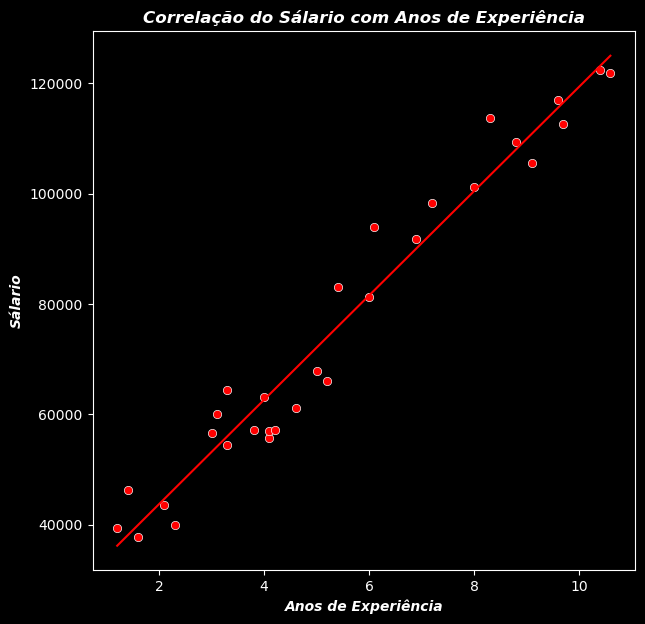

In [35]:
import seaborn as sns
from scipy.stats import linregress

X = salary['YearsExperience'].values
Y = salary['Salary'].values

coef_angular, coef_linear,_,_,std_err = linregress(X, Y)

reta = coef_angular*X+coef_linear



plt.style.use('dark_background')

plt.figure(figsize=(7,7))
sns.scatterplot(x=salary['YearsExperience'], y=salary['Salary'], color='red')
plt.plot(X,reta,label='Ajuste linear',color='red')
plt.xlabel("Anos de Experiência", fontweight='bold', style='italic')
plt.ylabel("Sálario", fontweight='bold', style='italic')
plt.title("Correlação do Sálario com Anos de Experiência", fontsize=12, fontweight='bold', style='italic')

plt.show()

### **Convertendo a Lista e Começando a Criação do Modelo de Regressão**

In [39]:
x_numpy = np.array(list(x), dtype = np.float32)
x_numpy

array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
        4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
        8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6], dtype=float32)

In [41]:
y_numpy = np.array(list(y), dtype = np.float32)
y_numpy

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.], dtype=float32)

In [42]:
x_torch = torch.tensor(x_numpy).unsqueeze(1)
x_torch, x_torch.dtype, x_torch.shape

(tensor([[ 1.2000],
         [ 1.4000],
         [ 1.6000],
         [ 2.1000],
         [ 2.3000],
         [ 3.0000],
         [ 3.1000],
         [ 3.3000],
         [ 3.3000],
         [ 3.8000],
         [ 4.0000],
         [ 4.1000],
         [ 4.1000],
         [ 4.2000],
         [ 4.6000],
         [ 5.0000],
         [ 5.2000],
         [ 5.4000],
         [ 6.0000],
         [ 6.1000],
         [ 6.9000],
         [ 7.2000],
         [ 8.0000],
         [ 8.3000],
         [ 8.8000],
         [ 9.1000],
         [ 9.6000],
         [ 9.7000],
         [10.4000],
         [10.6000]]),
 torch.float32,
 torch.Size([30, 1]))

In [43]:
y_torch = torch.tensor(y_numpy).unsqueeze(1)

### **Iniciando Criação do Modelo Regressão Linear Machine Learning**

In [44]:
import torch.nn as nn
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(1,1)
    def forward(self, x_torch):
        return self.layer(x_torch)

In [45]:
model = LinearRegression()

In [46]:
loss_fn = nn.MSELoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(params= model.parameters(), lr = learning_rate)

In [47]:
loss_list=[]
epochs = 1000
for epoch in range(epochs):
    model.train()
    
    y_pred = model(x_torch)
    
    loss = loss_fn(y_pred, y_torch)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    loss_list.append(loss.data)
    
    if(epochs % 10 == 0):
        print('epoch {}, loss {}'.format(epochs, loss.data))
    
    model.eval()

epoch 1000, loss 6502708736.0
epoch 1000, loss 5575259648.0
epoch 1000, loss 4783015424.0
epoch 1000, loss 4106262784.0
epoch 1000, loss 3528163584.0
epoch 1000, loss 3034335488.0
epoch 1000, loss 2612491008.0
epoch 1000, loss 2252136192.0
epoch 1000, loss 1944306304.0
epoch 1000, loss 1681343232.0
epoch 1000, loss 1456705536.0
epoch 1000, loss 1264805760.0
epoch 1000, loss 1100870912.0
epoch 1000, loss 960823360.0
epoch 1000, loss 841181312.0
epoch 1000, loss 738969280.0
epoch 1000, loss 651646080.0
epoch 1000, loss 577041216.0
epoch 1000, loss 513300384.0
epoch 1000, loss 458839424.0
epoch 1000, loss 412305600.0
epoch 1000, loss 372543360.0
epoch 1000, loss 338565184.0
epoch 1000, loss 309527936.0
epoch 1000, loss 284711072.0
epoch 1000, loss 263499632.0
epoch 1000, loss 245367584.0
epoch 1000, loss 229866240.0
epoch 1000, loss 216612016.0
epoch 1000, loss 205277216.0
epoch 1000, loss 195582112.0
epoch 1000, loss 187287696.0
epoch 1000, loss 180189584.0
epoch 1000, loss 174113536.0
e

### **Visualizando as Informações no Grafico Plot sobre o Aprendizado do Modelo ( Loss and Epochs )**

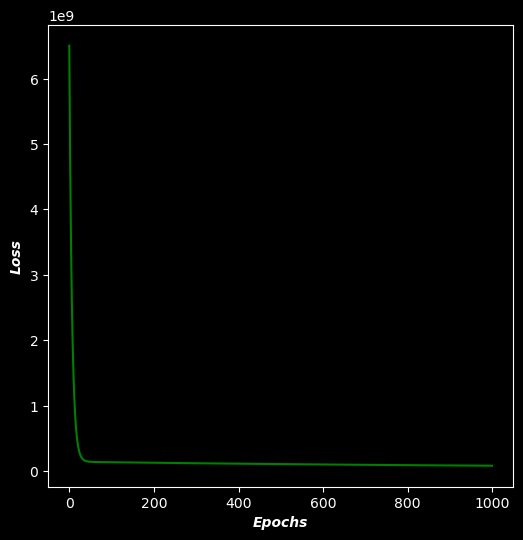

In [50]:
plt.figure(figsize=(6,6))
plt.plot(range(epochs),loss_list, color='green')
plt.xlabel("Epochs", fontweight='bold', style='italic')
plt.ylabel("Loss", fontweight='bold', style='italic')
plt.show()

### **Criando o Gráfico Final do Modelo de Regressão Linear para Visualização**

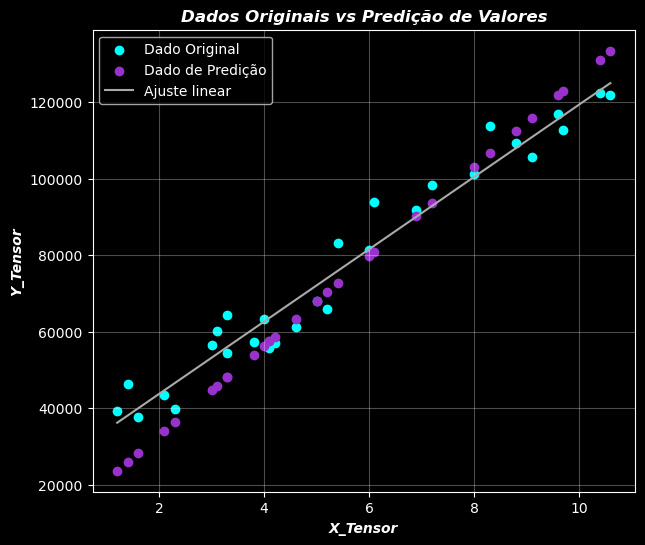

In [58]:
predicted = model(x_torch).data.numpy()

plt.figure(figsize=(7,6))
plt.scatter(x_torch, y_torch, label = "Dado Original", color = "cyan")
plt.scatter(x_torch, predicted, label = "Dado de Predição", color = "darkorchid")
plt.plot(X,reta,label='Ajuste linear',color='darkgray')

plt.grid(alpha=0.3)
plt.legend()
plt.xlabel("X_Tensor", fontweight='bold', style='italic')
plt.ylabel("Y_Tensor", fontweight='bold', style='italic')
plt.title("Dados Originais vs Predição de Valores", fontsize=12, fontweight='bold', style='italic')
plt.show()

## ***Conclusão Resumida:***
### **Ao vermos o  Modelo por completo, vemos que, de acordo com sua experiência profissional determinaria o seu salário, ou seja, quanto maior sua experiência no cargo que atua, maior será seu salário.**